<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/IMDBData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

In [44]:
df=pd.read_csv('IMDB Dataset.csv',encoding='utf-8')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
y=df['sentiment'].map({'positive': 1, 'negative': 0}).values


In [47]:
stop_words=set(stopwords.words('english'))

In [48]:
from nltk.tokenize import word_tokenize
def pre_process(text):
  text=re.sub(r'<.*?>','',text)
  text=re.sub(r'[^a-zA-Z]',' ',text)
  words=nltk.word_tokenize(text.lower())
  words=[word for word in words if word not in stop_words]
  return ' '.join(words)

In [49]:
nltk.download('punkt_tab')
X=df['review'].apply(pre_process)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
X_vectorizer=vectorizer.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_vectorizer,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8552
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



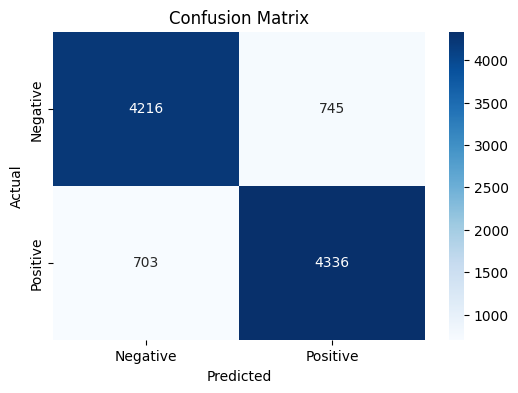

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()